# Assignment 5, Question 7: Group Operations & Final Analysis

**Points: 15**

Perform grouped analysis and create summary reports.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import utilities
from q3_data_utils import load_data, summarize_by_group

df = load_data('data/clinical_trial_raw.csv')
print(f"Loaded {len(df)} patients")

# Prewritten visualization function for grouped analysis
def plot_group_comparison(data, x_col, y_col, title):
    """
    Create a bar chart comparing groups.
    
    Args:
        data: DataFrame with grouped data
        x_col: Column name for x-axis (groups)
        y_col: Column name for y-axis (values)
        title: Chart title
    """
    plt.figure(figsize=(10, 6))
    data.plot(x=x_col, y=y_col, kind='bar')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Loaded 10000 patients


## Part 1: Basic Groupby (5 points)

1. Group by 'site' and calculate mean age, BMI, and blood pressure
2. Group by 'intervention_group' and count patients
3. Use the `summarize_by_group()` utility to get overall statistics by site

In [5]:
# TODO: Group by site

site_copy = df.copy()
site_copy['site'] = site_copy['site'].str.strip().str.lower().str.replace("_"," ").str.replace("  "," ")
site_summary = (
    site_copy.groupby('site')[['age', 'bmi', 'systolic_bp']].mean().reset_index()
)

print(site_summary)



     site        age        bmi  systolic_bp
0  site a  56.364005  25.875183   117.354284
1  site b  62.401957  25.706681   117.130675
2  site c  57.312108  25.789583   117.978359
3  site d  63.491006  25.565682   117.943662
4  site e  57.064897  25.476502   117.503080


In [9]:
# TODO: Count by intervention group

df_copy = df.copy()
intervention_group_counts = (
    df_copy.groupby('intervention_group').size().reset_index(name = 'patient_count')
)

print(intervention_group_counts)


   intervention_group  patient_count
0           CONTROL               84
1            Contrl               73
2           Control               95
3       TREATMENT A               65
4       TREATMENT B               83
5        Treatmen A               60
6      Treatment  B               64
7       Treatment A               66
8       Treatment B              104
9        TreatmentA               66
10          control               83
11      treatment a               67
12      treatment b               90
13            CONTROL            715
14             Contrl            802
15            Control            751
16        TREATMENT A            572
17        TREATMENT B            761
18         Treatmen A            592
19       Treatment  B            760
20        Treatment A            610
21        Treatment B            730
22         TreatmentA            635
23            control            734
24        treatment a            588
25        treatment b            750


**Note:** The `summarize_by_group()` function has an optional `agg_dict` parameter for custom aggregations. If you don't specify it, it will use `.describe()` on numeric columns. You can use `agg_dict={'age': ['mean', 'std'], 'bmi': 'mean'}` for custom aggregations.


In [7]:
# TODO: Use summarize_by_group utility
agg_dict = {
    'age': ['mean', 'std'],
    'bmi': ['mean', 'std'],
    'systolic_bp': ['mean', 'std']
 }

overall_stats = summarize_by_group(site_copy, group_col = 'site', agg_dict = agg_dict)

print(overall_stats)


              age                    bmi           systolic_bp           
             mean         std       mean       std        mean        std
site                                                                     
site a  56.364005  162.536292  25.875183  4.983102  117.354284  14.109332
site b  62.401957  139.050180  25.706681  5.017423  117.130675  13.532200
site c  57.312108  157.941868  25.789583  5.417217  117.978359  13.974010
site d  63.491006  136.140058  25.565682  5.881319  117.943662  13.906298
site e  57.064897  157.697644  25.476502  6.084532  117.503080  14.696501


## Part 2: Multiple Aggregations (5 points)

Group by 'site' and apply multiple aggregations:
- age: mean, std, min, max
- bmi: mean, std
- systolic_bp: mean, median

Display the results in a well-formatted table.

In [10]:
# TODO: Multiple aggregations
site_overall = (
    site_copy.groupby('site')
        .agg({
           'age': ['mean', 'std', 'min', 'max'],
           'bmi': ['mean', 'std'],
           'systolic_bp': ['mean', 'median']
        })
)

print(site_overall.to_string(index=False))

      age                           bmi          systolic_bp       
     mean        std  min max      mean      std        mean median
56.364005 162.536292 -999 100 25.875183 4.983102  117.354284  117.0
62.401957 139.050180 -999 100 25.706681 5.017423  117.130675  117.0
57.312108 157.941868 -999 100 25.789583 5.417217  117.978359  118.0
63.491006 136.140058 -999 100 25.565682 5.881319  117.943662  118.0
57.064897 157.697644 -999 100 25.476502 6.084532  117.503080  117.0


## Part 3: Comparative Analysis (5 points)

Compare intervention groups:
1. Calculate mean outcome_cvd rate by intervention_group
2. Calculate mean adherence_pct by intervention_group
3. Create a cross-tabulation of intervention_group vs dropout status
4. Visualize the comparison with a bar plot

In [ ]:
# TODO: Intervention group comparisons

# Change outcome_cvd to numeric 
df_copy['outcome_cvd'] = pd.to_numeric(df_copy['outcome_cvd'], errors = 'coerce')

# Calculate mean outcome_cvd rate by intervention_group
cvd_summary = (df_copy.groupby('intervention_group')['outcome_cvd'].mean().reset_index(name = 'mean_outcome_cvd'))

print(cvd_summary)

# Calculate mean adherence_pct by intervention_group
adherence_summary = (df_copy.groupby('intervention_group')['adherence_pct'].mean().reset_index(name='mean_adherence_pct'))   

print(adherence_summary)

#Create a cross-tabulation of intervention_group vs dropout 
cross_tab_inter_dropout = pd.crosstab(df_copy['intervention_group'], df_copy['dropout'])

print(cross_tab_inter_dropout) 





   intervention_group  mean_outcome_cvd
0           CONTROL                 NaN
1            Contrl                 NaN
2           Control                 NaN
3       TREATMENT A                 NaN
4       TREATMENT B                 NaN
5        Treatmen A                 NaN
6      Treatment  B                 NaN
7       Treatment A                 NaN
8       Treatment B                 NaN
9        TreatmentA                 NaN
10          control                 NaN
11      treatment a                 NaN
12      treatment b                 NaN
13            CONTROL               NaN
14             Contrl               NaN
15            Control               NaN
16        TREATMENT A               NaN
17        TREATMENT B               NaN
18         Treatmen A               NaN
19       Treatment  B               NaN
20        Treatment A               NaN
21        Treatment B               NaN
22         TreatmentA               NaN
23            control               NaN


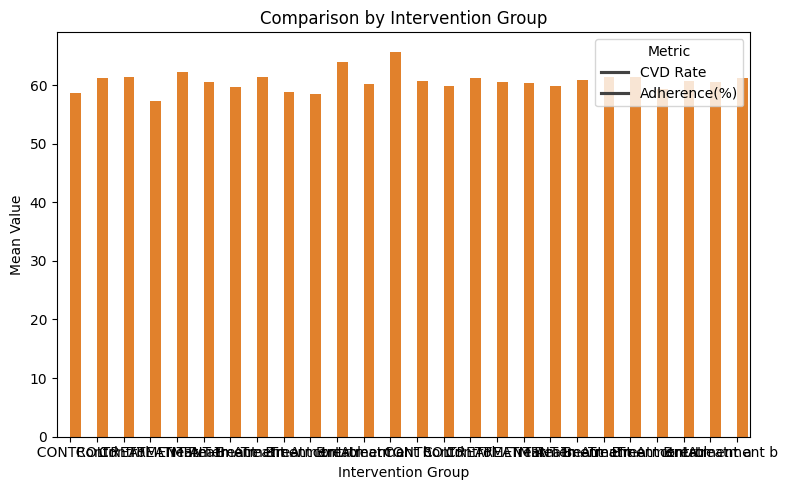

In [17]:
# TODO: Visualization

import seaborn as sns

merged_summary = pd.merge(cvd_summary, adherence_summary, on='intervention_group')

plot_df_copy = merged_summary.melt(id_vars = 'intervention_group', value_vars = ['mean_outcome_cvd', 'mean_adherence_pct'], var_name = 'Metric', value_name = 'Value')

plt.figure(figsize = (8,5))
sns.barplot(data = plot_df_copy, x = 'intervention_group', y = 'Value', hue = 'Metric')

plt.title('Comparison by Intervention Group')
plt.ylabel('Mean Value')
plt.xlabel('Intervention Group')
plt.legend(title = 'Metric', labels = ['CVD Rate', 'Adherence(%)'])
plt.tight_layout()
plt.show()
                                   





## Part 4: Final Report

Create and save:
1. Summary statistics by site → `output/q7_site_summary.csv`
2. Intervention group comparison → `output/q7_intervention_comparison.csv`
3. Text report with key findings → `output/q7_analysis_report.txt`

In [ ]:
# TODO: Save summary outputs

overall_stats.to_csv('output/q7_site_summary.csv')



## Summary

What are the 3 most important findings from your analysis?

**Key Findings:**

1. TODO
2. TODO
3. TODO
